## Introducción al Machine Learning
### Clustering Aglomerativo

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

/home/tomas/installs/pyenvs/miax/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import pickle

Pickle con las series históricas de los componentes del IBEX35

In [3]:
with open('../data/stock_data.pkl', 'rb') as handle:
    stock_data = pickle.load(handle)

In [4]:
close_dict = {ticker: df.close for ticker, df in stock_data.items()} 
close_data = pd.DataFrame(close_dict) 

Haremos clustering de las empresas del IBEX tomando 
como características las rentabilidades mensuales del último
año

In [5]:
close_df = close_data['2018-01-02':]

In [6]:
month_close = close_df.resample('M').last().dropna(axis=1)
month_ret = month_close.pct_change()[1:]

In [7]:
month_ret.head()

ACS       ACX      AENA       AMS       ANA      BBVA  \
2018-02-28 -0.121823  0.027860 -0.044457 -0.030730 -0.043872 -0.089588   
2018-03-31  0.117190 -0.068172 -0.023859 -0.009577 -0.114999 -0.066909   
2018-04-30  0.106793  0.026443  0.086133  0.012004  0.124757  0.071509   
2018-05-31  0.013703 -0.010734 -0.039743  0.118616 -0.068856 -0.132392   
2018-06-30  0.002244 -0.015625 -0.053561  0.005279  0.143356  0.040247   

                BKIA       BKT      CABK      CLNX  ...      NTGY       REE  \
2018-02-28 -0.037255 -0.020946 -0.077065 -0.027126  ...  0.011287 -0.062683   
2018-03-31 -0.073574 -0.067953 -0.034895  0.025047  ...  0.030561  0.045625   
2018-04-30  0.032939  0.038775  0.064523  0.025357  ...  0.078391  0.032875   
2018-05-31 -0.109953 -0.050230 -0.099777 -0.023831  ...  0.003826 -0.036458   
2018-06-30 -0.012015  0.019619  0.019252 -0.005067  ...  0.080515  0.086968   

                 REP       SAB       SAN      SGRE       TEF       TL5  \
2018-02-28 -0.029693 -0.098485 -0.052816  0.040971 -0.031504  0.045455   
2018-03-31 -0.019721 -0.037380 -0.065643 -0.004585  0.004379 -0.131905   
2018-04-30  0.099549  0.008523  0.026227  0.095202  0.050448  0.036465   
2018-05-31  0.028707 -0.115893 -0.143867 -0.077813 -0.105063 -0.030928   
2018-06-30  0.058451 -0.001739 -0.001739 -0.125428 -0.009725 -0.063051   

                 TRE       VIS  
2018-02-28 -0.024781 -0.071048  
2018-03-31 -0.103513  0.075192  
2018-04-30  0.115048 -0.019608  
2018-05-31 -0.054206  0.035455  
2018-06-30  0.090514  0.024583  

[5 rows x 33 columns]

In [13]:
features = month_ret.T
features.head()

2018-02-28  2018-03-31  2018-04-30  2018-05-31  2018-06-30  2018-07-31  \
ACS    -0.121823    0.117190    0.106793    0.013703    0.002244    0.081268   
ACX     0.027860   -0.068172    0.026443   -0.010734   -0.015625    0.137037   
AENA   -0.044457   -0.023859    0.086133   -0.039743   -0.053561   -0.000643   
AMS    -0.030730   -0.009577    0.012004    0.118616    0.005279    0.079882   
ANA    -0.043872   -0.114999    0.124757   -0.068856    0.143356    0.036661   

      2018-08-31  2018-09-30  2018-10-31  2018-11-30  2018-12-31  2019-01-31  \
ACS    -0.043710    0.022297   -0.097328    0.023256   -0.001476    0.081140   
ACX    -0.064242    0.063903   -0.199026   -0.108634   -0.015234    0.097206   
AENA   -0.018662   -0.019672   -0.055853   -0.006730   -0.031740    0.110866   
AMS     0.094795    0.001251   -0.110472   -0.111267   -0.038255    0.052301   
ANA     0.031556    0.029272   -0.044581    0.087423   -0.088779    0.124493   

      2019-02-28  2019-03-31  2019-04-30  2019-05-31  2019-06-30  
ACS     0.079778    0.004618    0.045199   -0.098461    0.033604  
ACX    -0.020623   -0.050924    0.049808   -0.087341    0.049486  
AENA    0.040451    0.022945    0.075672   -0.002721    0.047301  
AMS     0.042848    0.078550   -0.006723   -0.036097    0.043885  
ANA     0.028159    0.162219    0.040282   -0.072120    0.048513

In [14]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

In [15]:
## Función de los ejemplos de sklearn
def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


In [16]:
agg_model = AgglomerativeClustering(n_clusters=3)
agg_model = agg_model.fit(features)

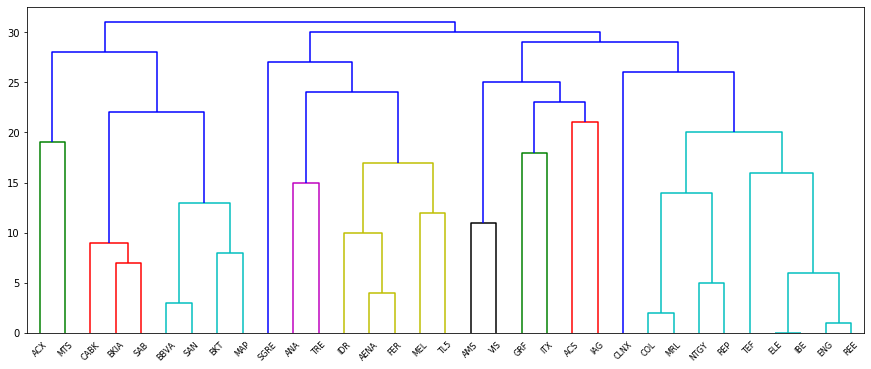

In [17]:
fig, ax = plt.subplots(figsize=(15,6))
plot_dendrogram(agg_model, labels=features.index)